# **Case study: E-commerce Marketing and sales**

<table align="center" width="100%">
    <tr>
        <td width="35%">
            <img src="https://i.postimg.cc/DZJ3dPdH/background-final.png"></img>
        </td>
        <td>
            <div align="center">
                <font color="#e66e82" size="5">
                    <b>E-Commerce Marketing and sales</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## **1. Introduction to the Dataset & Business Context**

### **1.1 Problem Statement**
The e-commerce company aims to leverage data-driven insights
1. **To Enhance** customer acquisition, retention, and revenue optimization.
2. **To Understand** key business trends.
3. **To Improve** decision-making through data-backed recommendations.

### **1.2 Key Business Objectives:**
1. <font color="teal">**Enhance Growth & Loyalty**</font>: Identify the strongest acquisition months and implement strategies to improve retention during weaker periods.
2. <font color="teal">**Optimize Marketing Efficiency**</font>: Evaluate the ROI of marketing campaigns to reallocate resources for better results.
3. <font color="teal">**Maximize Revenue**</font>: Analyze the balance between new and existing customer contributions and optimize discount strategies to maintain profitability.
4. <font color="teal">**Strategic Product Management**</font>: Identify top-performing products and seasonal trends to inform inventory and promotional planning.

### **1.3 About the Dataset**

**Dataset:** <font color="violet">**E-commerce Marketing & Sales**</font> 🛒  

We are exploring a comprehensive e-commerce dataset that includes
- **sale transaction logs** (Online_Sales.csv)
- **customer demographics** (CustomersData.xlsx)
- **marketing expenditures** (Marketing_Spend.csv)
- **discount details** (Discount_Coupon.csv)
- **tax slabs for categories** (Tax_amount.xlsx)

We’ll use this dataset to demonstrate advanced data manipulation techniques, using <font color="magenta">**NumPy**</font> and <font color="magenta">**pandas**</font> to merge disparate files and calculate core metrics like Invoice Value
$$Invoice\ Value = ((Quantity \times Avg\_price) \times (1 - Discount\_pct) \times (1 + GST)) + Delivery\_Charges$$


<font color="blue">**Note:**</font> Our initial look at the data reveals several key columns that will facilitate our analysis:
- <font color="orange">`CustomerID`</font> & <font color="green">`Transaction_ID`</font> (unique identifiers essential for merging and tracking acquisition)
- <font color="purple">`Transaction_Date`</font> (critical for time-series analysis and cohort tracking)
- <font color="purple">`Product_Category`</font> (group metrics over categories)
- `Quantity`, `Avg_price`, `Delivery_Charges`, <font color="red">`Discount_pct`</font> & <font color="brown">`GST`</font> (required for accurate revenue and profitability calculations)

This dataset offers a robust foundation for navigating the complexities of retail analytics and data-driven decision-making.

## **2. Data Pre-Analysis and Preparation**
Before diving deep into the specific business questions of the case study and tackling the given problem, Let's explore the given data their types and prepare it for solving further problems.

### **2.1 Data Loading and Environment Setup**

#### **2.1.1 Upload Data**
- Make sure to upload all the given datasets to collab's session storage before proceeding.

#### **2.1.2 Common Import statements**



In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visulaization
import matplotlib.pyplot as plt
import seaborn as sns

### **2.2 Data Analysis**

#### **2.2.1 Customer Data Analysis**

##### **2.2.1.1 Analysis**

In [ ]:
customers = pd.read_excel('CustomersData.xlsx')
customers.head(1)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [ ]:
customers.nunique()

,0
CustomerID,1468
Gender,2
Location,5
Tenure_Months,49


In [ ]:
customers['Gender'].value_counts()

,count
Gender,
F,934
M,534


In [ ]:
customers['Location'].value_counts()

,count
Location,
California,464
Chicago,456
New York,324
New Jersey,149
Washington DC,75


In [ ]:
customers.describe()

,CustomerID,Tenure_Months
count,1468.000000,1468.000000
mean,15314.386240,25.912125
std,1744.000367,13.959667
min,12346.000000,2.000000
25%,13830.500000,14.000000
50%,15300.000000,26.000000
75%,16882.250000,38.000000
max,18283.000000,50.000000


##### **2.2.1.2 Key Observations**
- `CustomerID` - column is unique column
- `Location` and `Gender` are categorical columns
- There are no null values


#### **2.2.2 Tax Data Analysis**

##### **2.2.2.1 Analysis**

In [ ]:
tax = pd.read_excel('Tax_amount.xlsx')
tax.head(1)

,Product_Category,GST
0,Nest-USA,0.1


In [ ]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [ ]:
tax.nunique()

,0
Product_Category,20
GST,4


In [ ]:
tax['GST'].value_counts()

,count
GST,
0.10,7
0.18,7
0.05,5
0.12,1


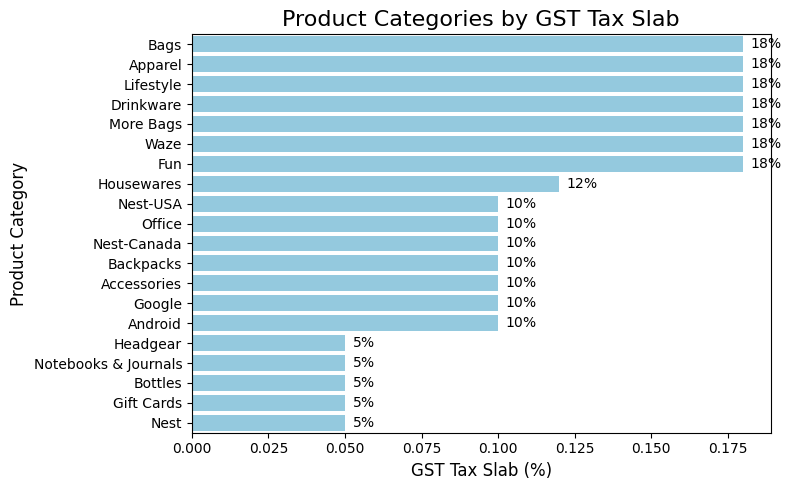

In [ ]:
tax_sorted = tax.sort_values(by='GST', ascending=False)

plt.figure(figsize=(8, 5))

ax = sns.barplot(x='GST', y='Product_Category', data=tax_sorted, color='skyblue')

plt.title('Product Categories by GST Tax Slab', fontsize=16)
plt.xlabel('GST Tax Slab (%)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

ax.bar_label(ax.containers[0], labels=[f'${int(x*100)}$%' for x in tax_sorted['GST']], padding=5)

plt.tight_layout()
plt.show()

##### **2.2.2.2 Key Observations**
- There are totaly `20 product categories` each comes under one of the GST tax slab
- There are no null values

#### **2.2.3 Discount coupon Data Analysis**


##### **2.2.3.1 Analysis**

In [ ]:
discount = pd.read_csv('Discount_Coupon.csv')
discount.head(1)

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10


In [ ]:
discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
discount.nunique()

,0
Month,12
Product_Category,17
Coupon_Code,48
Discount_pct,3


In [ ]:
discount['Discount_pct'].value_counts()

,count
Discount_pct,
10,68
20,68
30,68


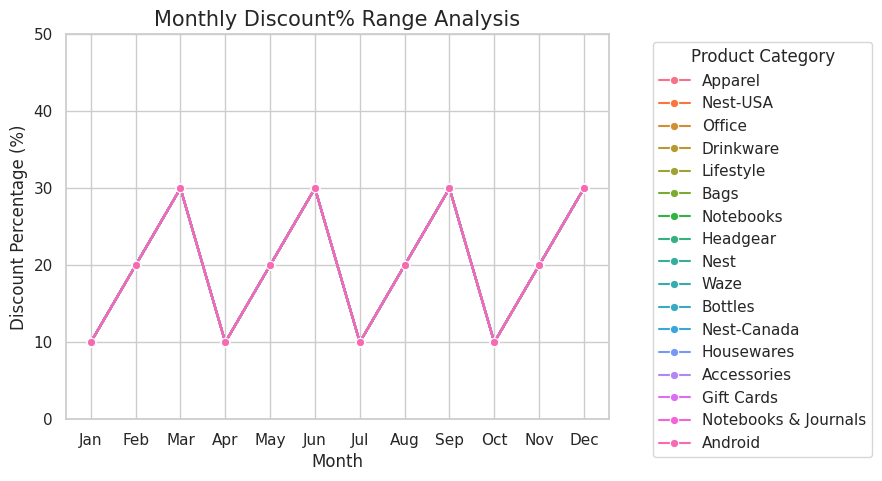

In [ ]:
plt.figure(figsize=(7, 5))
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x="Month", y="Discount_pct", hue='Product_Category',data=discount, marker='o')
ax.set_ylim(0, 50)
plt.title('Monthly Discount% Range Analysis', fontsize=15)
plt.ylabel('Discount Percentage (%)')
plt.xlabel('Month')
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.5, 1), title="Product Category")
plt.show()

##### **2.2.3.2 Key Observations**
- Discount is available only for 17 product categories for each month
- There are no null values.
- Discount is available as a zig zag format, where discount oscillates from 10% -> 20% -> 30% and again back to 10% in the fourth month.
- Monthly discount coupons are available and for any given month, discount % is same for any product categories.

#### **2.2.4 Marketing Spend Data Analysis**

##### **2.2.4.1 Analysis**

In [ ]:
marketing_spend = pd.read_csv('Marketing_Spend.csv')
marketing_spend.head(1)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.5


In [ ]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [ ]:
marketing_spend.nunique()

,0
Date,365
Offline_Spend,11
Online_Spend,365


In [ ]:
marketing_spend.describe()

,Offline_Spend,Online_Spend
count,365.000000,365.000000
mean,2843.561644,1905.880740
std,952.292448,808.856853
min,500.000000,320.250000
25%,2500.000000,1258.600000
50%,3000.000000,1881.940000
75%,3500.000000,2435.120000
max,5000.000000,4556.930000


##### **2.2.4.2 Key Observations**
- The date range is for entire 2019 year
- There are no null values
- Date type is object
- Offline_Spend is in Integer whereas Online_Spend is in float types

#### **2.2.5 Online transactions/sales data Analysis**

##### **2.2.5.1 Analysis**

In [ ]:
sales = pd.read_csv('Online_Sales.csv')
sales.iloc[0]

,0
CustomerID,17850
Transaction_ID,16679
Transaction_Date,1/1/2019
Product_SKU,GGOENEBJ079499
Product_Description,Nest Learning Thermostat 3rd Gen-USA - Stainle...
Product_Category,Nest-USA
Quantity,1
Avg_Price,153.71
Delivery_Charges,6.5
Coupon_Status,Used


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
sales.nunique()

,0
CustomerID,1468
Transaction_ID,25061
Transaction_Date,365
Product_SKU,1145
Product_Description,404
Product_Category,20
Quantity,151
Avg_Price,546
Delivery_Charges,267
Coupon_Status,3


<font color='Magenta'>**Inference:**</font> There are no column that matches the unique counts equivalent to no. of rows in this table, Transaction_ID being the closest.

In [ ]:
unique_row_count = sales.groupby(['Transaction_ID', 'Product_SKU']).size().shape
print(unique_row_count)

(52924,)


<font color='Magenta'>**Inference:**</font> Examining two sample rows with same Transaction_ID and comarping the differing columns, Transaction_ID and Product_SKU combination looks relevance and it has been confirmed based on row count, that this combination is unique.

In [ ]:
sales['Coupon_Status'].value_counts()

,count
Coupon_Status,
Clicked,26926
Used,17904
Not Used,8094


In [ ]:
sales.describe()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,32409.825675,4.497638,52.237646,10.517630
std,1766.55602,8648.668977,20.104711,64.006882,19.475613
min,12346.00000,16679.000000,1.000000,0.390000,0.000000
25%,13869.00000,25384.000000,1.000000,5.700000,6.000000
50%,15311.00000,32625.500000,1.000000,16.990000,6.000000
75%,16996.25000,39126.250000,2.000000,102.130000,6.500000
max,18283.00000,48497.000000,900.000000,355.740000,521.360000


##### **2.2.5.2 Key Observations**
- There are no null values
- Unique key for this table is determined and it is combination of `Transaction_ID` and `Product_SKU`
- Transaction data is all day of year 2019
- Transaction Data is present for 20 Product categories

### **2.3 Data Preparation**

#### **2.3.1 Data Handling Before Merging**


##### **2.3.1.1 Fixing type of Date columns**

In [ ]:
sales['Transaction_Date'] = pd.to_datetime(sales['Transaction_Date'])
marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'])

##### **2.3.1.2 Extracting Month column from Transaction Date**

In [ ]:
sales['Month'] = sales['Transaction_Date'].dt.strftime('%b')

##### **2.3.1.3 Deriving Total Spend value in marketing spend data**

In [ ]:
marketing_spend['Total_Spend'] = marketing_spend['Offline_Spend'] + marketing_spend['Online_Spend']

#### **2.3.2 Data Merging**

In [ ]:
merged_df = sales.merge(
    customers, on='CustomerID', how='left').merge(
        discount, on=['Month', 'Product_Category'], how='left').merge(
            tax, on='Product_Category', how='left').merge(
                marketing_spend, left_on='Transaction_Date', right_on='Date', how='left')
merged_df.shape

(52924, 21)

#### **2.3.3 Data Handling After Merging**

##### **2.3.3.1 Handling null values**

In [ ]:
merged_df.isna().sum()

,0
CustomerID,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0
Quantity,0
Avg_Price,0
Delivery_Charges,0
Coupon_Status,0


In [ ]:
merged_df[merged_df['Discount_pct'].isna()]['Product_Category'].value_counts()

,count
Product_Category,
Fun,160
Google,105
Backpacks,89
More Bags,46


- The null values are for product categories for which discount coupon is not available in discount table

In [ ]:
merged_df['Discount_pct'] = merged_df['Discount_pct'].fillna(0)
merged_df['Coupon_Code'] = merged_df['Coupon_Code'].fillna('None')

##### **2.3.3.2 Handling Discount Percent based on coupon status**

In [ ]:
merged_df.loc[merged_df['Coupon_Status'].isin(['Not Used', 'Clicked']), 'Discount_pct'] = 0

#### **2.3.4 Calculating Core Metrics Invoice Value/Revenue**

In [ ]:
merged_df['Revenue'] = (
    merged_df['Quantity'] * merged_df['Avg_Price'] * (1 - (merged_df['Discount_pct']/100))
    * (1 + merged_df['GST'])
) + merged_df['Delivery_Charges']

## **3. Solving Business usecase questions**

### **3.1 Business Question 1**

 #### **3.1.1 Question:** <font color='red'>Identify the months with the highest and lowest customer acquisition count. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?</font>

#### **3.1.2 Solution**


##### **3.1.2.1 Data Analysis and Visualization**

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

customer_month = merged_df[['CustomerID', 'Month']].drop_duplicates()
customer_month['Month'] = pd.Categorical(customer_month['Month'], categories=month_order, ordered=True)
customer_month = customer_month.sort_values(by='Month')

In [ ]:
# Finding Acquistion customer set and count per month
customer_transaction_first_month = customer_month.groupby('CustomerID').head(1)[['CustomerID', 'Month']]
monthly_customer_details = customer_transaction_first_month.groupby(
    'Month', observed=True)['CustomerID'].apply(set).reset_index()
monthly_customer_details = monthly_customer_details.rename(columns={'CustomerID': 'NewCustomerSet'})
monthly_customer_details['AcquisitionCount'] = monthly_customer_details['NewCustomerSet'].apply(len)

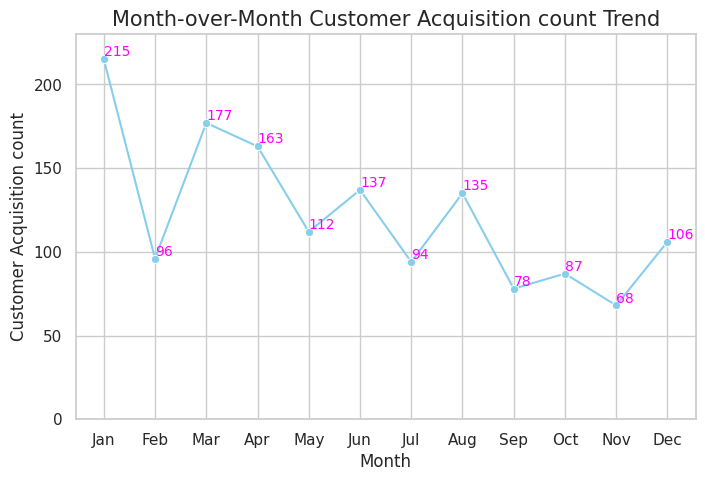

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
ax = sns.lineplot(x="Month", y="AcquisitionCount",data=monthly_customer_details, marker='o', color='skyblue')
ax.set_ylim(0,230)
for index, row in monthly_customer_details.iterrows():
    ax.text(row['Month'], row['AcquisitionCount'], f"{row['AcquisitionCount']}", color='magenta', ha="left",
            va="bottom", fontsize=10)

plt.title('Month-over-Month Customer Acquisition count Trend', fontsize=15)
plt.ylabel('Customer Acquisition count')
plt.xlabel('Month')

plt.show()

##### **3.1.2.2 Insights**

**Months with highest and lowest acquisition count**
- <font color='magenta'>Highest</font> is 215 customers in <font color='magenta'>`January`</font> Month
- <font color='green'>Lowest</font> is 68 customers in <font color='green'>`November`</font> Month

##### **3.1.2.3 Strategy Recommendations**
**To regulate the fluctuations in customer acquisition**
- **<font color='blue'>Pricing Strategy:</font>** Through means like providing `increased discounts` during low acquistion period to improve it, providing cashbacks/offers. New member exclusive discounts.
- **<font color='blue'>Marketing Strategy:</font>** `Increased marketing spend` targeting more sales during low acquistion period
- **<font color='blue'>Product release Strategy:</font>** `Launching new premium products` during low acquisition period
- **<font color='blue'>Customer Referral Strategy:</font>** Providing incentives to existing customers for referring new customers, can help to create new customers.

### **3.2 Business Question 2**

#### **3.2.1 Question:** <font color='red'>Analyze the data to determine if certain months consistently show higher or lower acquisition. How can the company capitalize on high-performing months and improve performance during slower periods?</font>

#### **3.2.2 Solution:**

##### **3.2.2.1 Data Analysis and Visualization**

In [ ]:
# Computing Total Marketing amount spent per month
marketing_spend_daily = merged_df[['Transaction_Date', 'Month', 'Total_Spend']].drop_duplicates()
marketing_spend_month = marketing_spend_daily.groupby('Month')['Total_Spend'].sum().reset_index()
marketing_spend_month['Month'] = pd.Categorical(
    marketing_spend_month['Month'], categories=month_order, ordered=True)
marketing_spend_month = marketing_spend_month.sort_values(by='Month')

In [ ]:
# Identifying no. of products launched per month
product_sku_month = merged_df[['Product_SKU', 'Month']].drop_duplicates()
product_sku_month['Month'] = pd.Categorical(product_sku_month['Month'], categories=month_order, ordered=True)
product_sku_month = product_sku_month.sort_values(by='Month')
product_sku_month = product_sku_month.groupby('Product_SKU', observed=True).head(1)[['Product_SKU', 'Month']]
product_sku_month = product_sku_month.groupby('Month', observed=True)['Product_SKU'].count().reset_index()


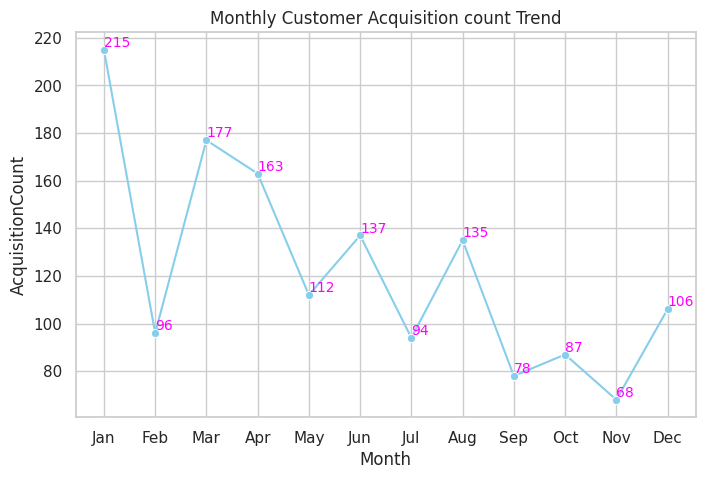

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(
    data=monthly_customer_details, x='Month', y='AcquisitionCount', color='skyblue', marker='o')
for index, row in monthly_customer_details.iterrows():
    ax.text(row['Month'], row['AcquisitionCount'], f"{row['AcquisitionCount']}",
            color='magenta', ha="left", va="bottom", fontsize=10)

ax.set_title('Monthly Customer Acquisition count Trend')
plt.show()

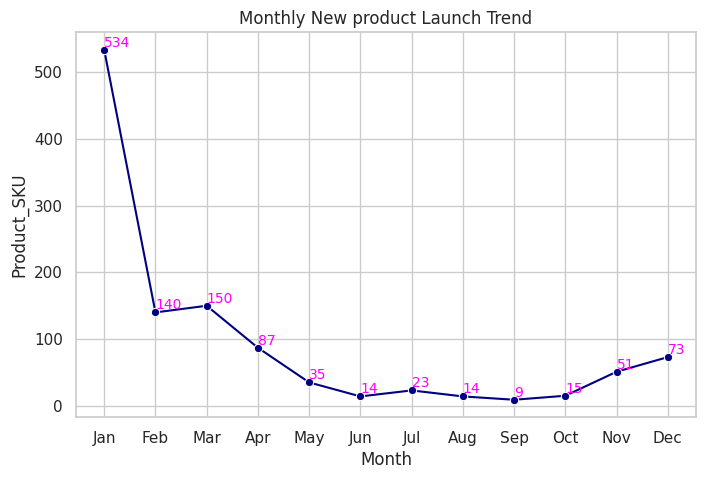

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=product_sku_month, x='Month', y='Product_SKU', color='navy', marker='o')
ax.set_title('Monthly New product Launch Trend')
for index, row in product_sku_month.iterrows():
    ax.text(row['Month'], row['Product_SKU'], f"{row['Product_SKU']}",
            color='magenta', ha="left", va="bottom", fontsize=10)

plt.show()

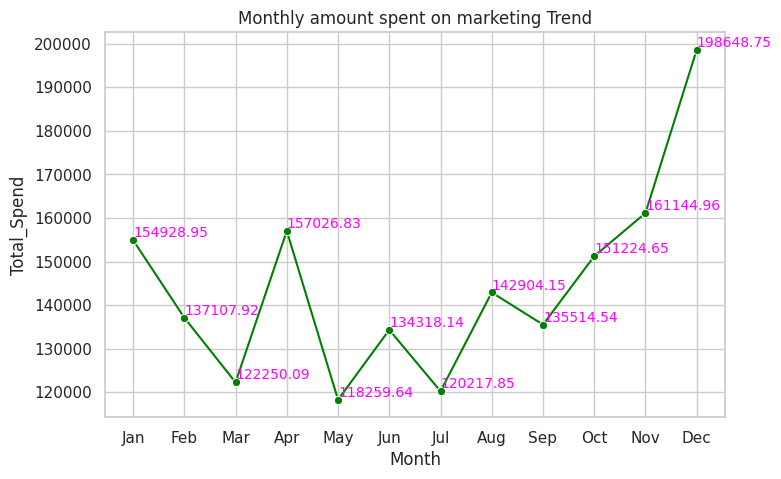

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=marketing_spend_month, x='Month', y='Total_Spend', color='green', marker='o')
ax.set_title('Monthly amount spent on marketing Trend')
for index, row in marketing_spend_month.iterrows():
    ax.text(row['Month'], row['Total_Spend'], f"{row['Total_Spend']}",
            color='magenta', ha="left", va="bottom", fontsize=10)
plt.show()


##### **3.2.2.2 Insights**
- A Zigzag Pattern of increase and decrease of customer acquisition count.
- An overall trend of decrease in the customer acquistion count month over month, having high amount of customer acquisition count in the January month and a gradual decrease thereafter.
- A steep dip in the second month of February
- A december raise during the holiday season
- **Comparing it's consistency against New product launches**
  - New product launch trend has some similarity with the customer acquistion count trend month over month. Showing high amount of new product launches in the January month, a steep dip in the february month and finally raising in the december month.
- **Comparing it's consistency against Amount spent on marketing**
  - High Marketing amount spent in the November and December month has helped customer acquisition to increase in the December month, but other than that the similarity is less.

##### **3.2.2.3 Strategy Recommendations**
**To Capitalize on high-performing months**
- **Maximizing Average Order Value:**
  - **Optimizing discount:** We have given 30% discount coupons in the December month, though there were high amount spent on marketing and new products were launched during that period. If we could have reduced the discount to 10% or 20% during that period, the revenue could have been more
  - **Bundling & Upselling:** We could create curated bundles of high-margin items that complement the high-demand products of that month.
- **Referral Boosters:** High-performing months imply high customer satisfaction/excitement. We could launch "Refer-a-Friend" double-bonus campaigns during these peaks to turn new customers into brand advocates immediately.
- **Subscription Conversion:** We can offer a first-month discount on subscriptions specifically to the new "one-time" shoppers during peak months to stabilize future revenue.

**To improve performance during slower periods**

- **Teach instead of just selling:** we can write simple guides or "how-to" tips related to the products. This attracts people who are just researching, allowing us to get their email addresses so we can sell to them later when they are ready to buy.
- **Let customers do the work:** We can Offer a "refer-a-friend" deal where both people get a discount. It is much cheaper to reward a happy customer for bringing a friend than it is to pay for expensive social media ads.
- **Create an artificial demand:** we can run a short 24-hour "flash sale" or group items together into a "starter kit" bundle. This creates excitement and gives people a reason to stop window shopping and actually checkout.

### **3.3 Business Question 3**

#### **3.3.1 Question:** <font color='red'>Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?</font>

#### **3.3.2 Solution**

##### **3.3.2.1 Data Analysis and Visualization**

In [ ]:
# Finding Set of all customers made transaction per month
monthly_customer_details['TotalCustomerSet'] = customer_month.groupby(
    'Month', observed=True)['CustomerID'].apply(set).reset_index()['CustomerID']
monthly_customer_details['Month'] = pd.Categorical(
    monthly_customer_details['Month'], categories=month_order, ordered=True)
monthly_customer_details = monthly_customer_details.sort_values(by='Month')

#Finding Total Customers transacted count per month
monthly_customer_details['TotalCustomerCount'] = monthly_customer_details['TotalCustomerSet'].apply(len)

In [ ]:
#Initialize temporary lists to store results
last_mon_sets = []
last_month_customers = set()

# Iterating directly over the Series is faster than using an index with .loc
for current_month_set in monthly_customer_details['TotalCustomerSet']:

    # Month-over-Month Overlap (Immediate previous month)
    lm_set = last_month_customers & current_month_set
    last_mon_sets.append(lm_set)

    # Update trackers for the next iteration
    last_month_customers = current_month_set

# Assign all lists to the DataFrame at once
monthly_customer_details = monthly_customer_details.assign(
    LastMonthOverlapCustomerSet=last_mon_sets,
)

In [ ]:
#Finding LastMonth Overlap Customer Count per month
monthly_customer_details['LastMonthOverlapCustomerCount'] = monthly_customer_details['LastMonthOverlapCustomerSet'].apply(len)

In [ ]:
# Computing retention rate
retention_rate = [
    round(
        monthly_customer_details.loc[i]['LastMonthOverlapCustomerCount']/
        monthly_customer_details.loc[i-1]['TotalCustomerCount'], 4
    ) * 100 for i in range(1,12)]
retention_rate = [0] + retention_rate # Jan month there is no retention
monthly_customer_details['RetentionRate'] = np.round(retention_rate, 2)

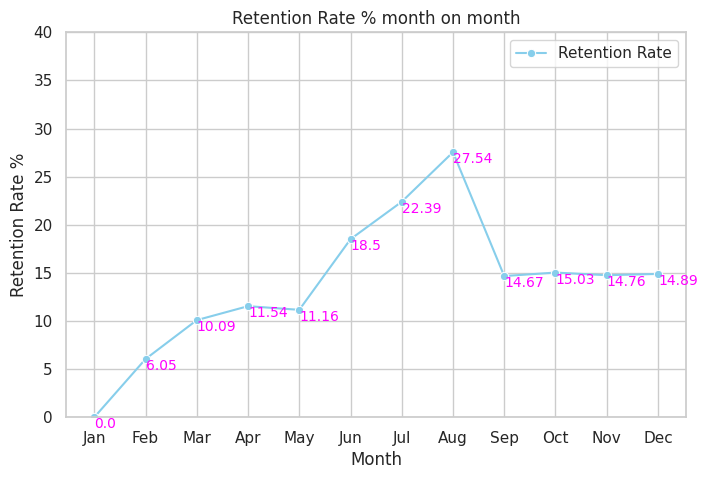

In [ ]:
# Set style
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Plot the lines
ax = sns.lineplot(
    data=monthly_customer_details, y='RetentionRate', x='Month', label='Retention Rate',
    color='skyblue', marker='o')
ax.set_ylim(0,40)

for index, row in monthly_customer_details.iterrows():
    ax.text(row['Month'], row['RetentionRate'], f"{row['RetentionRate']}", color='magenta',
            ha="left", va="top", fontsize=10)

plt.title('Retention Rate % month on month')
plt.ylabel('Retention Rate %')
plt.legend()
plt.show()

##### **3.3.2.2 Insights**
**Strongest and Weakest retention rates**
- **Strongest retention rate:** Over the period of June to August we are seeing the strongest retention rate, with peak during august with 27.54 % retention. This period coincides with the summer break.
- **Weakest retention rate:** Over the period of January to February we are seeing the weakest retention rate, with 6.05 % retention, this could be due to the excitement drop immediately after new launch. Apart from this we are also seeing huge drop after the peak in August, could be post-peak hangover due to budget exhaustion or a lack of immediate urgency.

##### **3.3.2.3 Strategy Recommendations**
**To improve retention during weaker months**
- **The "Bounce-Back" Mechanism:** The best time to save a customer from a weak month is during a strong month. During peak months, include a "Time-Locked" credit in their order. a digital voucher that is only valid during the specific upcoming weak month. It shifts the customer's mindset from "Should I spend money?" to "I have $20 sitting there that is about to expire."

- **Streak bridge Challenge:** We could launch a "3-Month Streak" challenge in August or January periods, If a customer makes a purchase (regardless of size) during the next two weakest months, they unlock "VIP Gold" status for the next peak season. The customer stays engaged during the slow month because they don't want to lose the streak.
- **Other proactive engagement measures:**
  - Send Automated "Replenishment" reminders with a small "Coming Back" discount based on the Lapsed Consumable
  - "Personal Outreach" or "Founders Note" with an exclusive sneak peek of next season.
  - Retargeting ads focusing on reviews rather than price.to overcome "Post-Peak" skepticism.
  - Providing pause option for subscriptions, as customers often churn during slow months to save money

### **3.4 Business Question 4**

#### **3.4.1 Question:** <font color='red'>Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.</font>

#### **3.4.2 Solution**

##### **3.4.2.1 Data Analysis and Visualization**

**Top 5 product categories bought during this period**


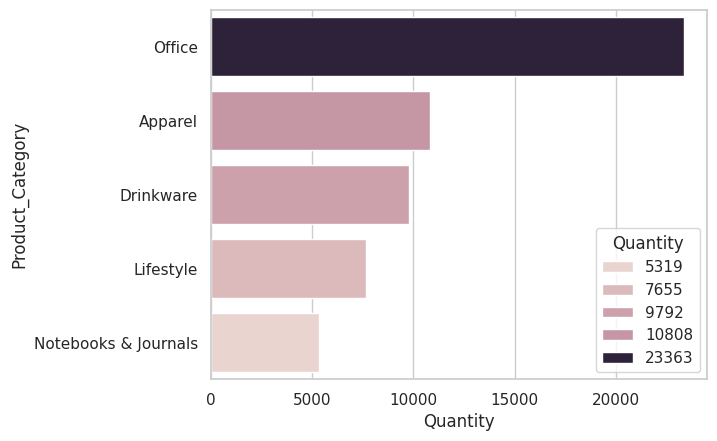

In [ ]:
june_to_august_sales = merged_df[merged_df['Month'].isin(['Jun','Jul', 'Aug'])].copy()
top5_product_categories_sold = june_to_august_sales.groupby('Product_Category')['Quantity'].sum(
).sort_values(ascending=False)[:5].reset_index()
sns.barplot(top5_product_categories_sold, y="Product_Category", x="Quantity", hue="Quantity", legend=True)
plt.show()

**Discount usage during this period**

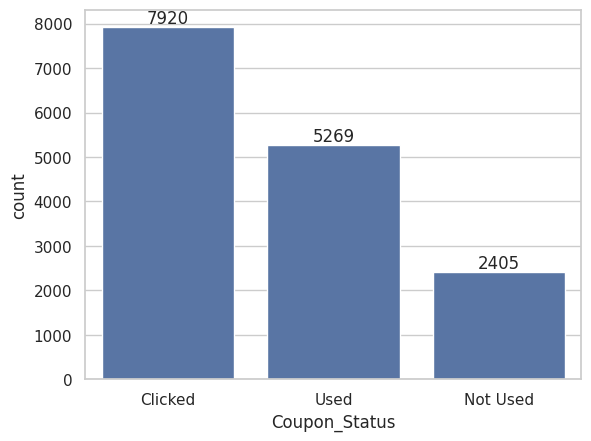

In [ ]:
ax = sns.barplot(june_to_august_sales['Coupon_Status'].value_counts())
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
CouponEngaged = (7920 + 5269)/(7920 + 5269 + 2405) * 100
print(CouponEngaged)
CouponUsed = 5269/(7920 + 5269 + 2405) * 100
print(CouponUsed)

84.57740156470437
33.78863665512377


**Distribution of Average price of items sold during this period**

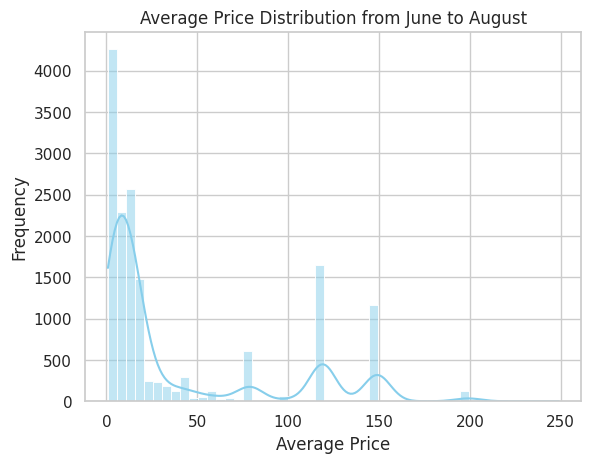

In [ ]:
sns.histplot(june_to_august_sales['Avg_Price'], kde=True, color='skyblue', bins=50)

# 3. Add labels and display the plot
plt.title('Average Price Distribution from June to August')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

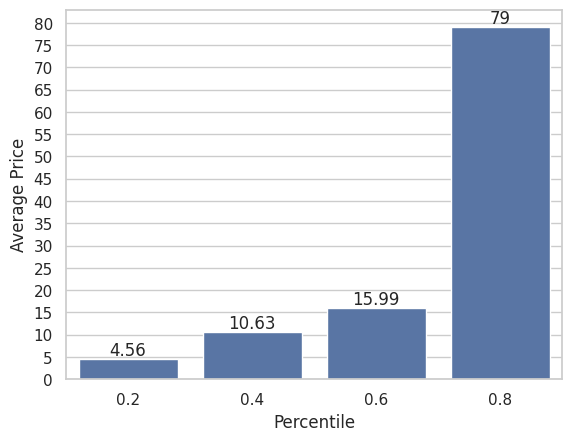

In [ ]:
percentiles_df = june_to_august_sales['Avg_Price'].quantile([0.2, 0.4, 0.6, 0.8]).reset_index()
ax = sns.barplot(data=percentiles_df, x='index', y='Avg_Price')
y_ticks = np.arange(0, 85, 5)
# Set the y-axis ticks
ax.set_yticks(y_ticks)
ax.set_xlabel("Percentile")
ax.set_ylabel("Average Price")
ax.bar_label(ax.containers[0])
plt.show()

##### **3.4.2.2 Insights**
- **Product Category sold:** Office Products or in other words daily consumable are sold the most during this period
- **Coupon Engagement:** Coupons been engaged for 84.5% of product purchased and been used for 33.78%
- **Price of product sold:**
  - `60 percentile` of products sold has average price within `$16`
  - `20 percentile` of products sold has average price within `$4.56`
  - This shows that people are interested in buying cheaper products, during higher retention rate periods.

##### **3.4.2.3 Strategy Recommendations`(To replicate this success throughout the year)`**
**The "Essential-First" Inventory Rotation:**
Since Office Products and Apparel drive these periods, it indicates that customers return when they are fulfilling "Utility" or "Renewable" needs.
- **The "Always-On" Essentials Hub:** We can create a permanent "Quick-Ship Essentials" section on the site that features these categories prominently, regardless of the season.
- **Subscription Models for Office Supplies:** Since office products are often recurring needs, we could offer a "Subscribe & Save" option specifically for this category to force high retention into "low" months.

**High-Velocity Couponing Strategy**
Data shows that 84.5% of purchases involve coupons. This suggests our high-retention customers are "Deal Seekers" who require an incentive to trigger a return visit.
- **Targeted Re-engagement Coupons:** Instead of site-wide sales, we can send personalized "Thank You" coupons specifically to customers 30 days after their last purchase to bridge the gap between months.
- **Gamified Reward Tokens:** We can implement a system where every purchase earns a "Next-Month-Only" discount. This forces the 84.5% coupon usage behavior to repeat in months that would otherwise be slow.

**"Entry-Level" Pricing Psychology**
Our analysis shows that 60% of products sold are under `$16` (with a significant chunk under `$4.56`). This indicates that high retention is driven by low-friction, impulse-buy pricing.
- **The `Under $20` Anchor:** We can keep a dedicated `Under $20` or "Stock Up" filter visible on the homepage year-round. This caters to the 60th percentile of our most loyal customers who prefer the `$16` price point.
- **Add-on Recommendations (The "Cart Filler"):** We could use the `$4.56` products as "Cart Fillers." At checkout, suggest these low-cost items to help customers reach a free shipping threshold. This replicates the high-volume/low-price behavior seen in our data.
- **Loss Leader Strategy:** We could use the `$4.56` products as "Lead Magnets" in our marketing during slow months. The goal isn't profit on that specific item, but to maintain the Retention Set by getting the customer through the digital door.

### **3.5 Business Question 5**

#### **3.5.1 Question:** <font color='red'>Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?</font>

#### **3.5.2 Solution**

##### **3.5.2.1 Data Analysis and Visualization**

In [ ]:
new_customer_revenue_list = []
existing_customer_revenue_list = []

for i, month in enumerate(month_order):
    customer_revenue = merged_df[merged_df['Month'] == month][['CustomerID', 'Revenue']]
    new_customer_revenue = customer_revenue[customer_revenue['CustomerID'].isin(monthly_customer_details['NewCustomerSet'].loc[i])]
    new_customer_revenue_list.append(new_customer_revenue['Revenue'].sum())
    existing_customer_revenue = customer_revenue[~customer_revenue['CustomerID'].isin(monthly_customer_details['NewCustomerSet'].loc[i])]
    existing_customer_revenue_list.append(existing_customer_revenue['Revenue'].sum())
monthly_customer_details['NewCustomerRevenue'] = new_customer_revenue_list
monthly_customer_details['ExistingCustomerRevenue'] = existing_customer_revenue_list

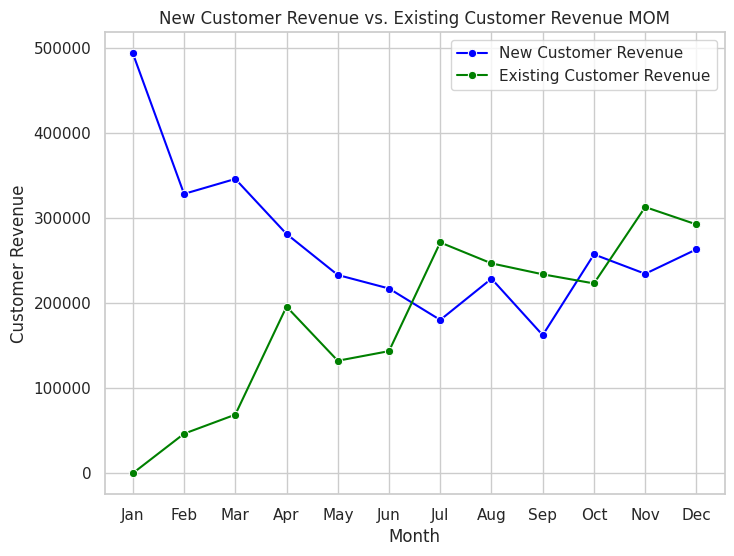

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))

# Plot the lines
sns.lineplot(x="Month", y="NewCustomerRevenue",
             data=monthly_customer_details, label='New Customer Revenue', color='blue', marker='o')
sns.lineplot(x="Month", y="ExistingCustomerRevenue",
             data=monthly_customer_details, label='Existing Customer Revenue', color='green', marker='o')

plt.title('New Customer Revenue vs. Existing Customer Revenue MOM')
plt.ylabel('Customer Revenue')
plt.legend()
plt.show()

##### **3.5.2.2 Insights**

This chart reveals a significant shift in the company's revenue engine over the course of the year. Here is a breakdown of what the trend suggests about the balance between acquisition and retention:

- **The "Early-Year" Phase:**
In January, revenue is almost entirely driven by new customers (approx. 490k), while existing customer revenue starts at zero. This is typical for a new Through Q1 (Jan–Mar), the company relied heavily on "filling the top of the funnel," with new customer revenue staying well above 320k.
- **The "Mid-Year" Phase:**
Around July, the lines cross. For the first time, revenue from existing customers (retention) surpassed revenue from new customers. From January to July, new customer revenue saw a steady, steep decline from 490k to roughly 180k. This could suggest market saturation, a reduction in ad spend, or a rising Customer Acquisition Cost (CAC).
- **The "Late-Year" Phase:**
From July through December, existing customer revenue remained the primary driver, peaking in November at nearly 310k. By Q4, the two metrics began to move more in tandem, suggesting the business has moved out of its "hyper-growth/acquisition" phase and into a "sustainable/mature" phase.

**Summary:**
The trend suggests that the company has successfully transitioned from a purely acquisition-focused startup model to a retention-driven mature model. While the growing loyalty of existing customers is a great sign of "Product-Market Fit," the declining acquisition line suggests the company might need to refresh its marketing strategy to prevent the total revenue ceiling from dropping.

### **3.6 Business Question 6**

#### **3.6.1 Question:** <font color='red'>Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?</font>

#### **3.6.2 Solution**

##### **3.6.2.1 Data Analysis and Visualization**

In [ ]:
monthly_discount_amount_list = []
monthly_revenue_involving_coupons_list = []
monthly_revenue_without_coupons_list = []
monthly_avg_transaction_value_involving_coupons_list = []
monthly_avg_transaction_value_without_coupons_list = []

for i, month in enumerate(month_order):
    monthly_sales = merged_df[merged_df['Month'] == month].copy()
    monthly_sales['DiscountApplied'] = np.round(
        monthly_sales['Quantity'] * monthly_sales['Avg_Price'] * monthly_sales['Discount_pct']/100, 2)
    monthly_discount_amount_list.append(monthly_sales['DiscountApplied'].sum())
    monthly_sales['RevenueWithoutDiscount'] = monthly_sales['Revenue'] + monthly_sales['DiscountApplied']

    monthly_transactions_coupon_used = monthly_sales.groupby('Transaction_ID').filter(
        lambda group: np.any(group['Coupon_Status'] == 'Used')
    )
    monthly_transactions_coupon_used = monthly_transactions_coupon_used.groupby(
        'Transaction_ID')['RevenueWithoutDiscount'].sum().reset_index()
    monthly_revenue_involving_coupons_list.append(
        monthly_transactions_coupon_used['RevenueWithoutDiscount'].sum())

    monthly_transactions_without_coupons = monthly_sales.groupby('Transaction_ID').filter(
        lambda group: np.all(~(group['Coupon_Status'] == 'Used'))
    )

    monthly_transactions_without_coupons = monthly_transactions_without_coupons.groupby(
        'Transaction_ID')['RevenueWithoutDiscount'].sum().reset_index()
    monthly_revenue_without_coupons_list.append(
        monthly_transactions_without_coupons['RevenueWithoutDiscount'].sum())

    monthly_avg_transaction_value_involving_coupons_list.append(
        monthly_transactions_coupon_used['RevenueWithoutDiscount'].mean())
    monthly_avg_transaction_value_without_coupons_list.append(
        monthly_transactions_without_coupons['RevenueWithoutDiscount'].mean())

monthly_customer_details['RevenueInvolvesCoupons'] = monthly_revenue_involving_coupons_list
monthly_customer_details['RevenueWithoutCoupons'] = monthly_revenue_without_coupons_list
monthly_customer_details['AvgTransactionValueInvolvesCoupons'] = monthly_avg_transaction_value_involving_coupons_list
monthly_customer_details['AvgTransactionValueWithoutCoupons'] = monthly_avg_transaction_value_without_coupons_list
monthly_customer_details['DiscountApplied'] = monthly_discount_amount_list


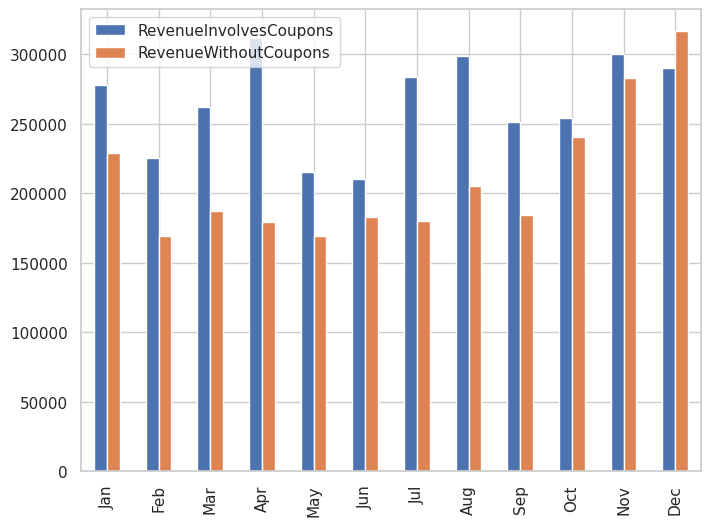

In [ ]:
plotdf = monthly_customer_details[['RevenueInvolvesCoupons', 'RevenueWithoutCoupons']]
plotdf.index = month_order
ax = plotdf.plot(kind='bar', figsize=(8, 6))
plt.show()

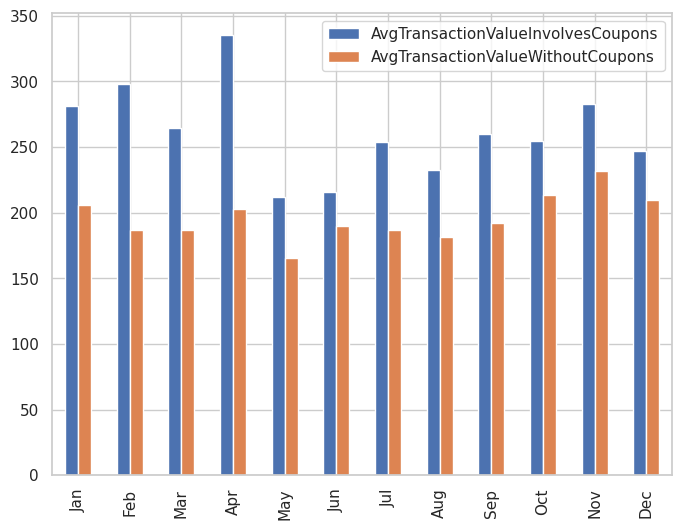

In [ ]:
plotdf = monthly_customer_details[['AvgTransactionValueInvolvesCoupons', 'AvgTransactionValueWithoutCoupons']]
plotdf.index = month_order
ax = plotdf.plot(kind='bar', figsize=(8, 6))
plt.show()

**Current Monthly Discount coupon Strategy**

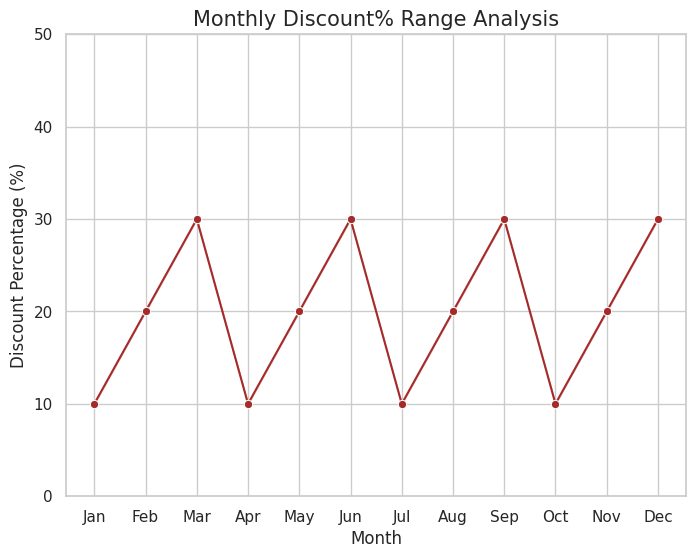

In [ ]:
plt.figure(figsize=(8, 6))

#sns.boxplot(data=discount, x='Month', y='Discount_pct')
ax = sns.lineplot(x="Month", y="Discount_pct",
             data=discount, marker='o', color='brown')
ax.set_ylim(0, 50)
plt.title('Monthly Discount% Range Analysis', fontsize=15)
plt.ylabel('Discount Percentage (%)')
plt.xlabel('Month')
plt.show()

##### **3.6.2.2 Insights**
- Almost for all months (except December) the Share of revenue from transactions involving `coupons is higher` than the share of revenue from transactions that does not involve coupons.
- For all the months the average transaction value of transactions that involve coupon is higher than the average transaction value of transactions that does not involve coupon. Showing that the more customers are attracted towards products with coupons, and making them add such products to their cart list before buying.

##### **3.6.2.3 Strategy Recommendations**
**To optimize discount strategies to maximize revenue while maintaining profitability**

The current discount strategy follows a rigid, sawtooth pattern (oscillating between 10% and 30% every three months) that does not align with actual consumer behavior or revenue trends.

To optimize revenue and profitability we can follow the below strategies:

- **Aligning the Discount Cycle with Seasonal Demand instead of quarterly cyclic based**
  - The current strategy follows a rigid "sawtooth" pattern, escalating from 10% to 30% every quarter regardless of actual consumer behavior. This creates a significant profit leak in December, where we apply the maximum 30% discount despite the fact that organic revenue (revenue without coupons) is already at its annual peak and the Average Transaction Value (ATV) is naturally high.
  - Conversely, in June, the 30% discount depth fails to significantly boost revenue, which remains among the lowest of the year. To maximize profitability, we should flatten the discount depth during high-intent months like December to protect margins and shift to more aggressive, traffic-driving tactics only during the low-revenue troughs of May and June.

- **Implementing Threshold-Based Discounting to Protect Margins**
  - The Data reveals that customers using coupons consistently have a higher ATV than those who do not. Instead of using flat percentage discounts that erode the margin across all basket sizes, we could implement `Spend $X, Get $Y Off` thresholds to leverage this "basket-building" behavior. By setting these spend requirements slightly above the existing coupon-driven ATV—which peaks near `$330` in April and averages around `$280` in the high-revenue month of November—we could force a higher spend to qualify for the saving. This ensures that the discount is only granted when the total revenue per transaction is high enough to offset the cost of the coupon, thereby maintaining a healthier contribution margin.

### **3.7 Business Question 7**

#### **3.7.1 Question:** <font color='red'>Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?</font>

#### **3.7.2 Solution**

##### **3.7.2.1 Data Analysis and Visualization**

**Analysing top selling products by quantity**

In [ ]:
top_5_selling_products = merged_df.groupby('Product_SKU')['Quantity'].sum().sort_values(ascending=False).head(5)
top_5_selling_products = top_5_selling_products.reset_index()
aggregations = {
    'Avg_Price': 'mean',
    'Delivery_Charges': 'mean',
    'Discount_pct': 'mean',
    'GST': 'mean'
}
sku_mapping = merged_df.groupby(
    ['Product_SKU', 'Product_Description', 'Product_Category'])[['Avg_Price', 'Delivery_Charges', 'Discount_pct', 'GST']].agg(
        aggregations).reset_index()
top_5_selling_products = pd.merge(top_5_selling_products, sku_mapping, how='left', on='Product_SKU')
top_5_selling_products

,Product_SKU,Quantity,Product_Description,Product_Category,Avg_Price,Delivery_Charges,Discount_pct,GST
0,GGOEGGOA017399,16234,Maze Pen,Office,0.914733,14.378021,6.818182,0.10
1,GGOEGDHC018299,9728,Google 22 oz Water Bottle,Drinkware,2.684666,13.617153,6.363636,0.18
2,GGOEGBMJ013399,7321,Sport Bag,Bags,4.431446,13.461569,6.421569,0.18
3,GGOEGOLC014299,6496,Google Metallic Notebook Set,Office,5.290741,18.898810,7.645503,0.10
4,GGOEGFKQ020399,5847,Google Laptop and Cell Phone Stickers,Office,2.498139,12.485422,6.885856,0.10


**Analysing top selling products by revenue**

In [ ]:
top_5_selling_products_by_revenue = merged_df.groupby('Product_SKU')['Revenue'].sum().sort_values(
    ascending=False).head(5)
top_5_selling_products_by_revenue = top_5_selling_products_by_revenue.reset_index()
top_5_selling_products_by_revenue = pd.merge(
    top_5_selling_products_by_revenue, sku_mapping, how='left', on='Product_SKU')
top_5_selling_products_by_revenue

,Product_SKU,Revenue,Product_Description,Product_Category,Avg_Price,Delivery_Charges,Discount_pct,GST
0,GGOENEBJ079499,731870.6912,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,150.981874,7.108143,6.784392,0.1
1,GGOENEBQ078999,671620.0665,Nest Cam Outdoor Security Camera - USA,Nest-USA,121.806541,7.308020,6.514423,0.1
2,GGOENEBB078899,567867.4926,Nest Cam Indoor Security Camera - USA,Nest-USA,120.214594,7.115607,6.318885,0.1
3,GGOENEBQ079099,229033.0425,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,79.838692,6.803659,6.429096,0.1
4,GGOENEBQ079199,225275.9108,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,79.748254,7.021155,7.211268,0.1


##### **3.7.2.2 Insights**
**Top selling by Quantity**
- In general daily Consumables (Pen, water bottle, sport bag, notebook set) are the most selling products with respect to quantity.
- Average price of these top selling products are in single digits and the top most prodcut Maze Pen is less than a dollar.
- Average Delivery charges are bit higher comparitively around `$14` for these products.
- Average discount is around 6.5%
- Tax (GST) is around 10%

**Factors driving successs**
- **Affordability:** Low selling price less than '$5'
- **Demand for daily consumables:** These are essential products

**Top selling by Revenue**
- In general home essentials (Thermostats, Security cameras, Smoke alarms) are the top most revenue anchor products.
- Average price of the top selling thermo stat product is `$150`
- Average Delivery charges are bit lower in single digit comparitively around `$7` for these products.
- Average discount is around 6.5%
- Tax (GST) is around 10%

**Factors driving successs**
- **Affordability:** Low selling price less than '$10'
- **Demand for home essentials:** These are necessary products

##### **3.7.2.3 Strategy Recommendations**
**Inventory Management Strategies**
Inventory approach must balance the high turnover of low-cost items with the capital intensity of high-ticket items.

- **High Stock Levels / Buffer Stock** Daily Consumables are essential, "impulse" items. Stockouts lead to lost customers who will easily find alternatives elsewhere, keep the stock level always high.
- **Just-in-Time (JIT) / Lean Inventory**	Home essentials With an average price of $150, holding too much stock ties up significant working capital. we can aim for high precision in forecasting.
- **Velocity-Based Slotting:**	Place consumables near packing stations to reduce labor time and delivery charges for these high-frequency picks.
- **Key Action: Cross-Category Bundling**
Since consumables have high delivery charges (`$14`) relative to their price (`$1`), we can use them as "Add-on" items. Store them in the same fulfillment centers as the home essentials to enable "One Box" shipping, which reduces the perceived sting of the delivery fee for the customer.

**Promotional & Pricing Strategies**
The goal here is to use the consumables to drive traffic and the home essentials to drive margin.
- **For Daily Consumables (The "Traffic Drivers")**
  - **Threshold-Based Free Shipping:** Since delivery is `$14` (often more than the product itself), we could offer "Free Shipping on orders over `$35`." This encourages customers to buy 10+ pens or a mix of consumables to "save" on the delivery fee.
  - **Subscription Models:** For products like notebooks or pens, offer a "Subscribe & Save" (e.g., an extra 5% discount) to ensure recurring revenue and predictable inventory demand.
  - **Quantity Breaks:** We can Promote "Buy 5, Get 1 Free" to increase the average order value (AOV) and make the `$14` shipping charge feel more proportional to the total cost.
- **For Home Essentials (The "Revenue Anchors")**
  - **Bundled Protection/Installation:** Since these are "necessary" home products, we can promote them alongside professional installation or extended warranties rather than deep discounts.
  - **Tiered Discounts:** Since the current average discount is 6.5%, we can try a "Buy a Thermostat, get a Notebook set for 50% off" promo. This moves the high-volume stock while maintaining the margin on the $150 anchor product.

### **3.8 Business Question 8**

#### **3.8.1 Question:** <font color='red'> Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?</font>

#### **3.8.2 Solution**

##### **3.8.2.1 Data Analysis and Visualization**

**Analysis of relationship between monthly marketing spend and revenue**

In [ ]:
monthly_revenue = merged_df.groupby('Month')['Revenue'].sum().reset_index()
monthly_revenue['Month'] = pd.Categorical(monthly_revenue['Month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values(by='Month')
monthly_revenue['Total_Marketing_Spend'] = marketing_spend_month['Total_Spend']
monthly_revenue['ROI'] = np.round(
    (monthly_revenue['Revenue'] - monthly_revenue['Total_Marketing_Spend']) * 100
    /monthly_revenue['Total_Marketing_Spend'], 2)

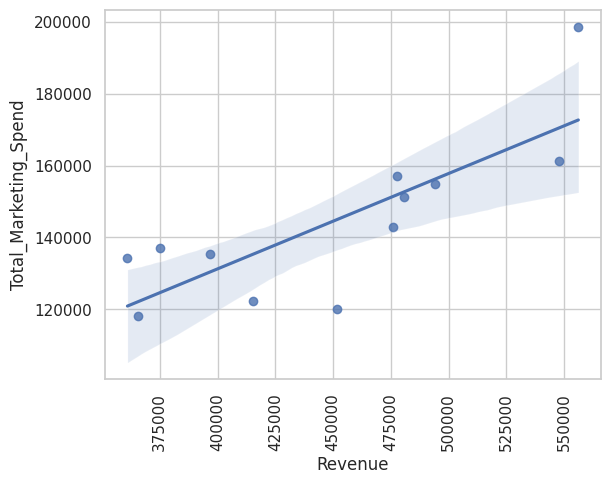

In [ ]:
sns.regplot(data=monthly_revenue, x='Revenue', y='Total_Marketing_Spend')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print("Correlation is:", monthly_revenue['Total_Marketing_Spend'].corr(monthly_revenue['Revenue']))

Correlation is: 0.79628352475623


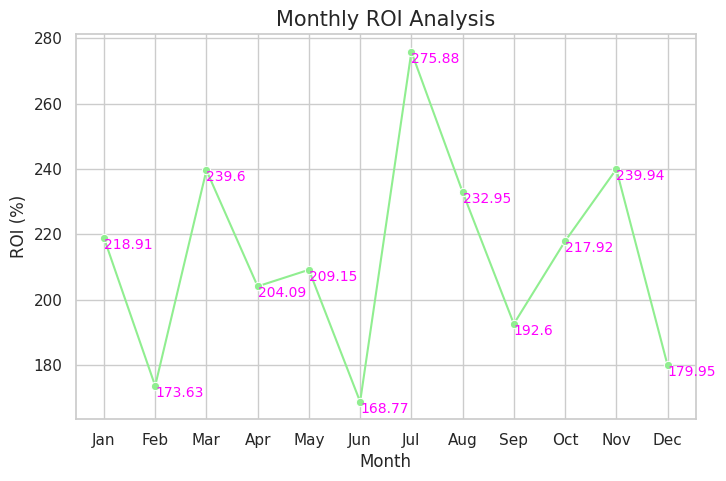

In [ ]:
plt.figure(figsize=(8, 5))

ax = sns.lineplot(x="Month", y="ROI",
             data=monthly_revenue, marker='o', color='lightgreen')
plt.title('Monthly ROI Analysis', fontsize=15)
plt.ylabel('ROI (%)')
plt.xlabel('Month')
for index, row in monthly_revenue.iterrows():
    ax.text(row['Month'], row['ROI'],
            f"{row['ROI']}", # The text label to display
            color='magenta',         # Label color
            ha="left",           # Horizontal alignment
            va="top",           # Vertical alignment (above the point)
            fontsize=10,
            )           # Font size

plt.show()

##### **3.8.2.2 Insights**
**Correlation**
The correlation value between marketing spend to Revenue is ~80%, shows that revenue moves based on our marketing spend.

**Disproportional Return Performance**

Analysis of the ROI line chart reveals significant volatility throughout the year:
- **High-Return Months (Efficiency Peaks)**
  - **July (275%):** This is the highest ROI month of the year. Marketing efforts were most efficient here, likely capturing peak demand with optimized spend.
  - **November (240%) & March (240%):** These months show secondary peaks, suggesting successful seasonal campaigns or higher conversion rates on high-ticket items.
- **Low-Return Months (Efficiency Troughs)**
  - **June (168%):** The lowest ROI of the year. This suggests a "marketing fatigue" or high spend that didn't convert, possibly due to poor targeting or external competition.
  - **February (173%) & December (180%):** Despite December often being a high-revenue month, the ROI is low. This indicates that the Total Marketing Spend (as seen in the scatter plot) was likely very high, but the high costs of acquisition or high shipping fees on low-cost consumables eroded the return.

##### **3.8.2.3 Strategy Recommendations**
**Strategic Adjustments to Improve ROI**
To stabilize these fluctuations and drive higher returns, the following adjustments could be made:

- **Optimizing the "Spend-to-Revenue" Ratio**
The scatter plot shows a clear positive correlation, but there are outliers where spend is high for moderate revenue, which needs to be addressed.
  - **Cap Spend in Low-Performance Windows:** In months like June and February, shift from "broad reach" awareness ads to "retargeting" existing customers. This reduces the cost-per-acquisition (CPA).
  - **Identify the "ROI Sweet Spot":** Analyze the specific campaigns run in July. If July’s success was driven by Home Essentials (high revenue per unit), replicate those specific high-intent search keywords in other months.
  - **Incentivize High-AOV Bundles:** During low-ROI months like June, run "Bundle & Save" promotions. Instead of marketing a single `$1` Maze Pen, market a "Home Office Starter Kit" (`$25+`). This spreads the $14 shipping cost across more items, increasing the margin and improving ROI.

- **Tactical Campaign Adjustments**
  - **Dynamic Shipping Thresholds:** If ROI is dipping because customers are buying single `$5` items with `$14` shipping (leading to cart abandonment), use marketing to highlight a "Free Shipping over `$50`" banner. This pushes the customer to add high-revenue products to their cart.
  - **Leverage Seasonality for Consumables:** Focus heavy marketing for consumables (pens/notebooks) specifically during "Back to School" or "End of Financial Year" periods when volume is high enough to justify the shipping logistics, and pull back spend in months where they underperform.

### **3.9 Business Question 9**

#### **3.9.1 Question:** <font color='red'> Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?</font>

#### **3.9.2 Solution**

##### **3.9.2.1 Data Analysis and Visualization**

In [ ]:
monthly_revenue['Marketing_Spend_Percent'] = np.round(
    monthly_revenue['Total_Marketing_Spend'] * 100/monthly_revenue['Revenue'], 2)

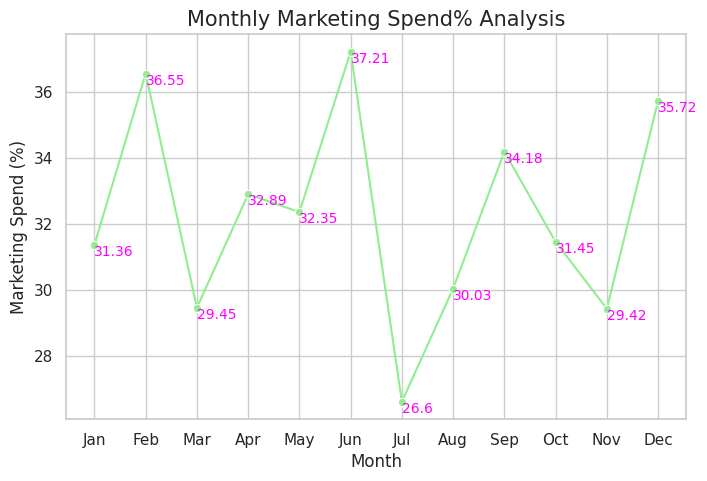

In [ ]:
plt.figure(figsize=(8, 5))

ax = sns.lineplot(x="Month", y="Marketing_Spend_Percent",
             data=monthly_revenue, marker='o', color='lightgreen')
plt.title('Monthly Marketing Spend% Analysis', fontsize=15)
plt.ylabel('Marketing Spend (%)')
plt.xlabel('Month')
for index, row in monthly_revenue.iterrows():
    ax.text(row['Month'], row['Marketing_Spend_Percent'], f"{row['Marketing_Spend_Percent']}",
            color='magenta', ha="left", va="top", fontsize=10)

plt.show()

##### **3.9.2.2 Insights**
- **Overspending in February & June:** These months represent the lowest efficiency; hitting the highest annual marketing spend peaks (36.55% and 37.21%).
- **Organic Strength in July:** This month is the most efficient, achieving a notable revenue recovery despite having the year's lowest marketing spend (26.6%), indicating strong natural demand that requires less promotional support.

##### **3.9.2.3 Strategy Recommendations**
**Strategic Reallocation Opportunities**
To improve overall ROI and efficiency, resources should be reallocated from low-performing periods to high-potential ones.
- **Capitalize on High-Efficiency Windows**
  - **Increase Investment in July & November:** Since these months show the highest ROI and lowest spend-to-revenue ratios, there is likely "untapped" demand. Transitioning budget to these months can scale revenue without disproportionately increasing costs.
  - **Replicate Peak Strategies:** Analyze the specific campaigns used in July (e.g., specific channels or product focuses) and apply those successful tactics to "shoulder" months like August or October to stabilize efficiency.
- **Corrective Actions for Low-Efficiency Months**
  - **Reduce Spend in June & February:** The high spend percentage in these months (~37%) suggests diminishing returns. Reducing aggressive "top-of-funnel" spending during these troughs can prevent wasted budget.
  - **Reduce Spend in December:** We are seeing higher sales and higher customer acquistion during festival peak in December. As the demand is natural in that month, we could reduce the marketing spent for that month.

### **3.10 Business Question 10**

#### **3.10.1 Question:** <font color='red'> Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)</font>

#### **3.10.2 Solution**

##### **3.10.2.1 Data Analysis and Visualization**

**Compute RFM and segment customers:**

In [ ]:
today = pd.to_datetime('2020-01-01')
rfm = merged_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (today - x.max()).days,   # Recency
    'Transaction_ID': 'count',                              # Frequency
    'Revenue': 'sum'                                        # Monetary
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,108,2,174.98174
1,12347,60,60,15686.84396
2,12348,74,23,1689.55594
3,12350,18,17,1467.43528
4,12356,108,36,2007.42900
...,...,...,...,...
1463,18259,271,7,860.68600
1464,18260,88,40,3016.54372
1465,18269,195,8,166.90750
1466,18277,70,1,333.80000


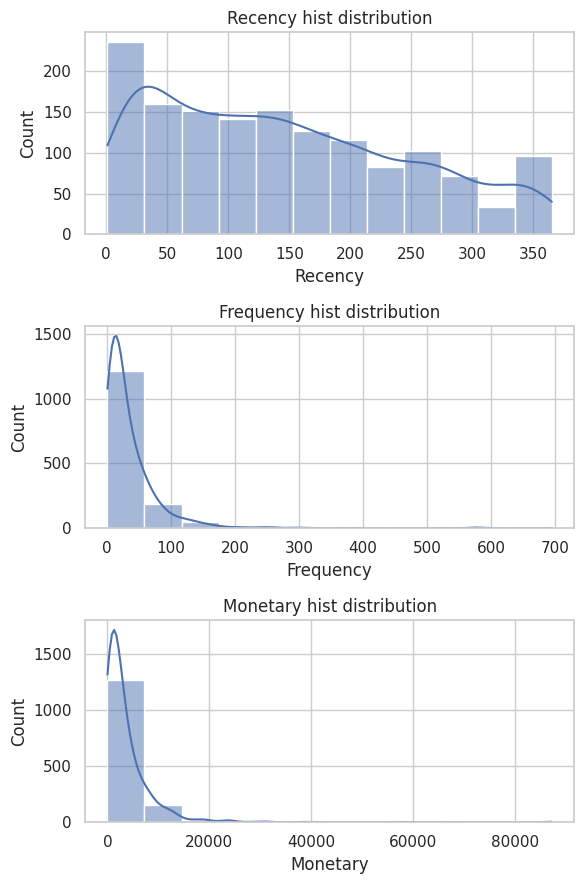

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 9))

sns.histplot(data=rfm, x="Recency", kde=True, bins=12, ax=axes[0])
axes[0].set_title('Recency hist distribution')

sns.histplot(data=rfm, x="Frequency", kde=True, bins=12, ax=axes[1])
axes[1].set_title('Frequency hist distribution')

sns.histplot(data=rfm, x="Monetary", kde=True, bins=12, ax=axes[2])
axes[2].set_title('Monetary hist distribution')

plt.tight_layout()

plt.show()

In [ ]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=['4','3','2','1'])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=4, labels=['1','2','3','4'])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=['1','2','3','4'])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

def classify_customer(score):
    if score in ['443', '444', '344']:
        return 'Premium'
    elif score in ['442', '433',  '244', '343', '334', '434', '144']:
        return 'Gold'
    elif score in [
        '233', '133', '243', '441', '431', '432', '424', '423', '422', '324', '234', '414', '333', '323', '223',
        '143', '114', '124', '134', '214', '224']:
        return 'Silver'
    else:
        return 'Standard'

rfm['CustomerSegment'] = rfm['RFM_Score'].apply(classify_customer)


##### **3.10.2.2 Strategy Recommendations**
**Targeted strategies for each segment to improve retention and revenue:**

**1. Premium Segment (The Champions)**
Profile: High Recency, High Frequency, High Monetary (e.g., 444, 443, 434). They are the most loyal and profitable customers.

- **Retention Strategy:** Offer these customers permanent free shipping to eliminate the `$14` delivery friction on consumables, ensuring they don't look elsewhere for daily items.

- **Revenue Strategy:** Focus on exclusive early access. When launching new high-ticket "Home Essentials" like security cameras, give this segment a 48-hour head start to purchase. Since they already spend heavily, focus on maintaining their "Top-of-Mind" status rather than using deep discounts.

**2. Gold Segment (The Loyalists)**
Profile: Consistent buyers with high frequency but perhaps slightly lower spend or beginning to lapse (e.g., 442, 244).

- **Retention Strategy:** Use re-activation triggers for those with falling Recency (like the 244 group). Send "We miss you" personalized emails featuring the specific daily consumables they buy most often to bring them back into the "active" window.

- **Revenue Strategy:** Drive Upselling. Since many in this group are frequent buyers of low-cost items (F=4, M=2), offer them a discount on a "Home Essential" item (M=4) if they reach a certain yearly spend threshold. This moves them from Gold to Premium.

**3. Silver Segment (The Potential Growth)**
Profile: Often includes new high-spenders or high-value customers who have lapsed (e.g., 414, 144).
- **Retention Strategy:** Focus on re-engagement for big spenders. The 144 score represents a customer who spent over `$8,500` but hasn't returned in 235+ days. Send them a high-value "Win-back" offer, such as a `$50` credit toward their next home essential purchase.
- **Revenue Strategy:** Focus on Cross-Selling and Bundling. For new high-spenders (414), use their first purchase (e.g., a thermostat) as a hook to introduce "Daily Consumable" subscriptions. This builds the Frequency  habit required to move them into the Gold or Premium tiers.

**4. Standard Segment (The Low-Engagement)**
Profile: Infrequent, low-spending, or one-time buyers (e.g., 111, 212).

- **Retention Strategy:** Use automated "Welcome" and "Nurture" sequences. Many in this group may have been deterred by the `$14` shipping on a `$1` pen. Send them content highlighting the value of "Full Home Solutions" to change their perception of our brand from a stationery shop to a home essentials provider.
- **Revenue Strategy:** Implement Threshold-based Incentives. Instead of broad discounts, offer "Free Shipping on our next order over $50". This encourages "Standard" customers to bundle multiple items, making the transaction profitable for us and a better "deal" for them.

### **3.11 Business Question 11**

#### **3.11.1 Question:** <font color='red'>Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?</font>


#### **3.11.2 Solution**

##### **3.11.2.1 Data Analysis and Visualization**

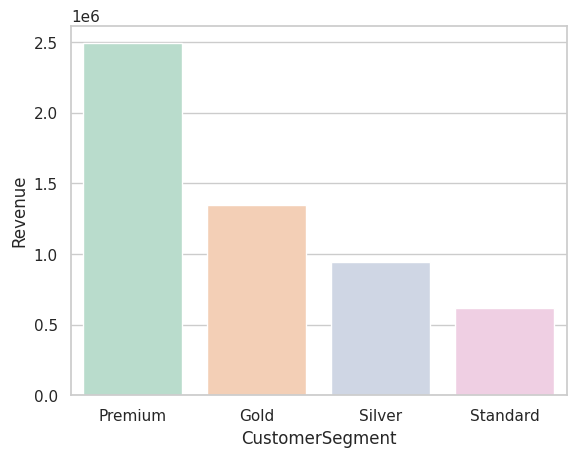

In [ ]:
customer_segment = rfm[['CustomerID','CustomerSegment']].set_index('CustomerID')['CustomerSegment']
merged_df['CustomerSegment'] = merged_df['CustomerID'].map(customer_segment)
customer_segment_revenue = merged_df.groupby('CustomerSegment')['Revenue'].sum().reset_index()
customer_segment_order = ['Premium', 'Gold', 'Silver', 'Standard']
customer_segment_revenue['CustomerSegment'] = pd.Categorical(
    customer_segment_revenue['CustomerSegment'], categories=customer_segment_order, ordered=True)
sns.barplot(customer_segment_revenue, x='CustomerSegment', y='Revenue', hue='CustomerSegment', palette='Pastel2')
plt.show()

##### **3.11.2.2 Insights**
- **Premium Segment Dominance:** The Premium tier is the highest revenue contributor, generating approximately 2.5 million.
- **Sequential Revenue Drop:** Revenue follows a clear hierarchical decline across segments, with Gold contributing 1.35 million, Silver contributing 0.95 million, and Standard contributing the least at 0.6 million.
- **Concentration of Value:** The Premium segment alone generates more revenue than the Silver and Standard segments combined.

##### **3.11.2.3 Strategy Recommendations**
**1. Focusing on High-Value Segments (Premium & Gold)**

Combined, these two segments now generate approximately $3.85M, representing the vast majority of our business's financial health.

- **Premium Segment (`$2.5M`):** This is our most critical asset.
  - **Retention through VIP Perks:** To protect this revenue, offer permanent shipping waivers or a dedicated service line. Since high delivery charges (`$14`) are a known friction point for our consumables, removing this cost for Premium members ensures they remain loyal.
  - **Strategic Timing:** Schedule major high-ticket launches (e.g., `$150` Thermostats) during our high-efficiency months like July (274.79% ROI) and November (239.88% ROI) to maximize the yield from this group.
- **Gold Segment (`$1.35M`):** This segment represents our "Loyalists" who have high frequency but potentially lower per-order spend.
  - **Incentivized Upgrading:** Use milestone rewards to move them into the Premium tier. For example, offer a "Gold-to-Premium" challenge where reaching a specific spending threshold unlocks the same free shipping perks enjoyed by Premium members.

**2. Nurturing Lower-Value Segments (Silver & Standard)**

These segments contribute a combined $1.55M and represent our primary pipeline for future growth and recovery.
- **Silver Segment (`$0.95M`):** This group often contains "At Risk" high-spenders or new customers with high potential.
  - **Personalized Reactivation:** For lapsed high-spenders (e.g., score 144), use personalized "Win-Back" campaigns. Offering a significant credit (`$25–$50`) towards a "Home Essential" item can reignite their interest in our high-margin products.
  - **Low-Efficiency Buffer:** Deploy these reactivation efforts during low-ROI months like June (168.33% ROI) or February (173.06% ROI) to help stabilize revenue troughs.
- **Standard Segment (`$0.6M`):** This group is transactional and likely sensitive to our high shipping costs.
  - **Basket-Building Strategies:** Since these customers typically buy low-cost consumables (e.g., `$1` Maze Pens), the `$14` shipping fee is a major deterrent. Nurture them with "Bundle and Save" offers. Promote kits that combine multiple daily essentials to hit a `$50` free-shipping threshold, effectively turning a `$5` customer into a `$50` customer.
- **Reduced delivery fee across all segments:** Provide a discount in delivery fee across all segments, the discount percent could vary for each segment.

### **3.12 Business Question 12**

#### **3.12.1 Question:**  <font color='red'>Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?</font>

#### **3.12.2 Solution**

##### **3.12.2.1 Data Analysis and Visualization**

In [ ]:
retention_rate_matrix = np.zeros((12,12))
for index, month in enumerate(month_order):
  cohort_customer = monthly_customer_details['NewCustomerSet'].loc[index]
  for i in range(index, 12):
    overlapping_customers = cohort_customer & monthly_customer_details['TotalCustomerSet'].loc[i]
    retention_rate_matrix[index][i] = round(len(overlapping_customers)/len(cohort_customer), 4) * 100
retention_rate_df = pd.DataFrame(data=retention_rate_matrix, columns=month_order, index=month_order)
pd.set_option('display.width', 1000)
print(retention_rate_df)

       Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep     Oct     Nov     Dec
Jan  100.0    6.05   11.16   15.81   10.70   20.47   16.28   21.86   10.70   13.02    9.30   15.81
Feb    0.0  100.00    7.29    9.38   16.67   17.71   22.92   19.79   15.62   12.50   11.46   16.67
Mar    0.0    0.00  100.00   10.17   19.77   14.12   18.08   18.64   12.43   12.43    8.47   10.73
Apr    0.0    0.00    0.00  100.00    8.59   14.72   14.72   11.04    9.20    6.13    9.82    7.36
May    0.0    0.00    0.00    0.00  100.00   10.71    8.04   11.61    8.93   11.61   12.50    7.14
Jun    0.0    0.00    0.00    0.00    0.00  100.00   14.60   16.06    8.76    8.03   10.22    8.03
Jul    0.0    0.00    0.00    0.00    0.00    0.00  100.00   13.83    4.26    6.38   11.70    9.57
Aug    0.0    0.00    0.00    0.00    0.00    0.00    0.00  100.00   10.37   11.11    7.41    5.93
Sep    0.0    0.00    0.00    0.00    0.00    0.00    0.00    0.00  100.00    7.69    3.85    2.56
Oct    0.0

##### **3.12.2.2 Insights**
**Highest Retention Cohorts:**
- **January Cohort (Long-term Resilience):**
This cohort shows remarkable stability. After an initial dip, it surges to `20.47%` in June and `21.86%` in August. Its Year-End retention in December remains strong at `15.81%`.
- **July Cohort (Initial Stickiness):** Exhibits the highest Month 1 retention rate at `13.83%` (August), followed by a strong December finish at `11.70%`.
- **June Cohort (Short-term Peak):** This cohort reached a peak of `14.60%` retention in its first month (July).

**Lowest Retention Cohorts:**
- **September Cohort:** This cohort experiences the sharpest decline, dropping to just `3.85%` in November and `2.56%` in December.
- **October Cohort:** Shows the lowest Month 1 retention in the dataset at `6.90%` for November and ends the year at `4.60%`.
- **May Cohort (Late-year Fade):** While it started strong, it dropped to `7.14%` in December, one of the lower year-end figures for an established cohort.

##### **3.12.2.3 Strategy Recommendations `(To Improve Weaker Cohorts)`**
The "weaker" cohorts (September and October) were acquired during a period where our Monthly ROI was recovering from a September dip.

**Corrective Onboarding (For October/September)**
- **Immediate Re-engagement:** Since the October cohort drops to `6.90%` in its first month, implement an automated "Day 15" check-in email. Offer a "Second Purchase" discount on Daily Consumables to build the shopping habit early.
-**Shipping Friction Mitigation:** These cohorts may have been deterred by the $14 delivery charge on small items. Offer "Free Shipping on our 2nd order" to ensure they return after their initial acquisition purchase.

**Strategic Win-Backs (For May/September)**
- **Bundle-Driven Reactivation:** For the September cohort, which faded to `2.56%`, send a "Complete our Home" bundle offer. Combine their previous low-cost purchases with a high-value Home Essential item to increase the perceived value and justify the shipping cost.
- **Leverage High-ROI Months:** Use the high efficiency of November (`239.88%` ROI) to target these drifting cohorts with aggressive "Early Holiday" offers to pull them back into the active cycle.

**Predictive Retention**
- **Identify "January Traits":** Analyze what the January cohort purchased to achieve such high long-term retention (`15.81%` in Dec). If they started with high-ticket items, push those same "Gateway Products" to new cohorts in September and October to mirror that success.

### **3.13 Business Question 13**

#### **3.13.1 Question:** <font color='red'>Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?</font>

#### **3.13.2 Solution**

##### **3.13.2.1 Data Analysis and Visualization**

**Lifetime value of customers**

In [ ]:
customer_cohort = {
  'CustomerID': [],
  'CustomerCohort': []
}
customer_cohort_df = pd.DataFrame(data=customer_cohort)
for index, month in enumerate(month_order):
  cohort_customer = monthly_customer_details['NewCustomerSet'].loc[index]
  new_row_data = [[customerid, month] for customerid in cohort_customer]
  new_row_df = pd.DataFrame(new_row_data, columns=customer_cohort_df.columns)
  customer_cohort_df = pd.concat([customer_cohort_df, new_row_df], ignore_index=True)

customer_cohort_df['CustomerID'] = customer_cohort_df['CustomerID'].astype('int')
customer_cohort_df = customer_cohort_df.set_index('CustomerID')['CustomerCohort']
merged_df['CustomerCohort'] = merged_df['CustomerID'].map(customer_cohort_df)

cohort_revenue = merged_df.groupby('CustomerCohort')['Revenue'].sum().reset_index()
cohort_revenue['CustomerCohort'] = pd.Categorical(
    cohort_revenue['CustomerCohort'], categories=month_order, ordered=True)
cohort_revenue = cohort_revenue.sort_values(by='CustomerCohort')

cohort_revenue['RevenuePerCustomer'] = cohort_revenue['Revenue']/monthly_customer_details['AcquisitionCount']

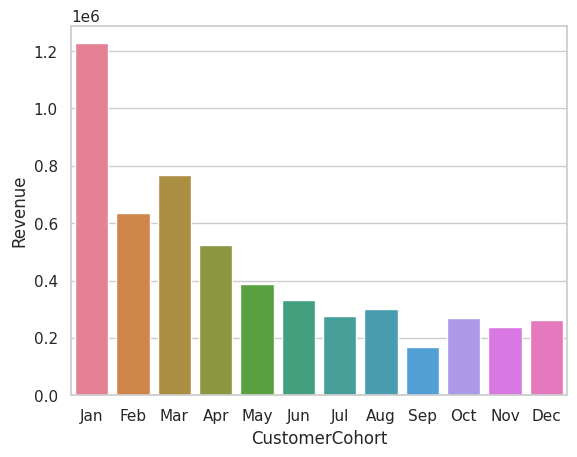

In [ ]:
sns.barplot(data=cohort_revenue, x='CustomerCohort', y='Revenue', hue='CustomerCohort')
plt.show()

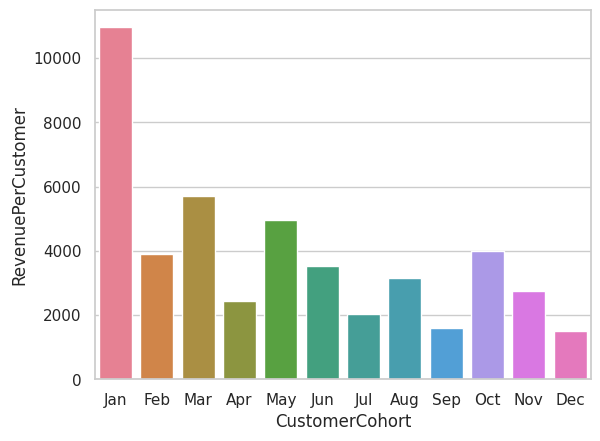

In [ ]:
sns.barplot(data=cohort_revenue, x='CustomerCohort', y='RevenuePerCustomer', hue='CustomerCohort')
plt.show()

##### **3.13.2.2 Insights**
- **January Cohort Superiority:** Customers acquired in January are by far the most valuable, contributing over `$1.2 million` in total revenue with a significantly higher individual value of approximately `$11,000` per customer.
- **Declining Value Trend:** There is a general downward trend in both total revenue and revenue per customer for cohorts acquired later in the year, hitting a notable low point in September.
- **Secondary Value Peaks:** While the overall trend declines, the March, May, and October cohorts show distinct "peaks" in individual customer value compared to the months immediately surrounding them.

##### **3.13.2.3 Strategy Recommendations**
**Strategic Insights for Acquisition**

Understanding these cohorts can help us to optimize the Customer Acquisition Cost (CAC):
- **Aggressive Investment in January:** Since Jan customers have a significantly higher Life Time Value (LTV), the company can afford a much higher CAC during this month. We could front-load the marketing budget here, as the "return on investment" is proven to be superior.
- **Replicate Acquisition pattern of Mar/May:** These months show "peaks" in individual value. Analyze what marketing campaigns or seasonal offers were running then. If these customers are more valuable, we should replicate those specific messaging or targeting strategies.
- **Re-evaluate September:** September shows the lowest LTV. The company should investigate if the leads acquired are "discount hunters" who do not provide long-term value.

**Strategic Insights for Retention**

Retention efforts should be prioritized based on the potential "loss" of high-value segments:
- **Protect the January Cohort:** Because the average Jan customer is worth `~5x` a Sep customer, losing one Jan customer is a major financial blow. Implement "VIP" loyalty programs or dedicated account management specifically for the early-year cohorts.
- **Identify the "Drop-off" Points:**
The steady decline in Total Revenue from Jan to Jul suggests that newer cohorts might not be sticking around as long as the early ones, or the product-market fit varies by season.
- **Nurturing the "Value Peaks":** Customers from March, May, and October show higher individual value than their immediate neighbors (April or September). Targeted re-engagement campaigns (email marketing, personalized discounts) should be focused on these specific cohorts to maximize their high spending potential.

### **3.14 Business Question 14**

#### **3.14.1 Question:** <font color='red'>Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?</font>

#### **3.14.2 Solution**

##### **3.14.2.1 Data Analysis and Visualization**

In [ ]:
sales_trend_category = merged_df.groupby(['Product_Category', 'Month'])['Revenue'].sum().reset_index()
sales_trend_category = sales_trend_category.sort_values(by='Revenue', ascending=False)
sales_trend_category = sales_trend_category.groupby('Month').head(5)
sales_trend_location = merged_df.groupby(['Location', 'Month'])['Revenue'].sum().reset_index()
sales_trend_category['Month'] = pd.Categorical(
    sales_trend_category['Month'], categories=month_order, ordered=True)
sales_trend_location['Month'] = pd.Categorical(
    sales_trend_location['Month'], categories=month_order, ordered=True)

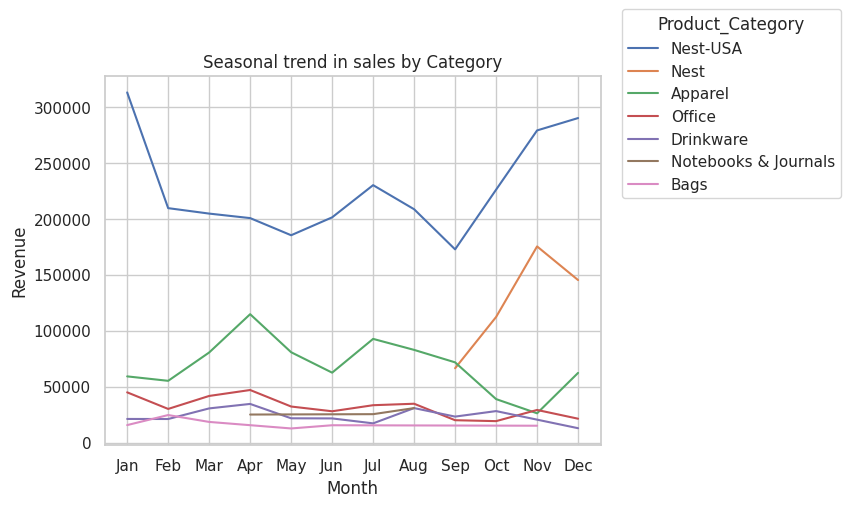

In [ ]:
ax = sns.lineplot(data=sales_trend_category, x="Month", y='Revenue', hue='Product_Category')
ax.set_title('Seasonal trend in sales by Category')
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.5, 1.2), title="Product_Category")
plt.show()

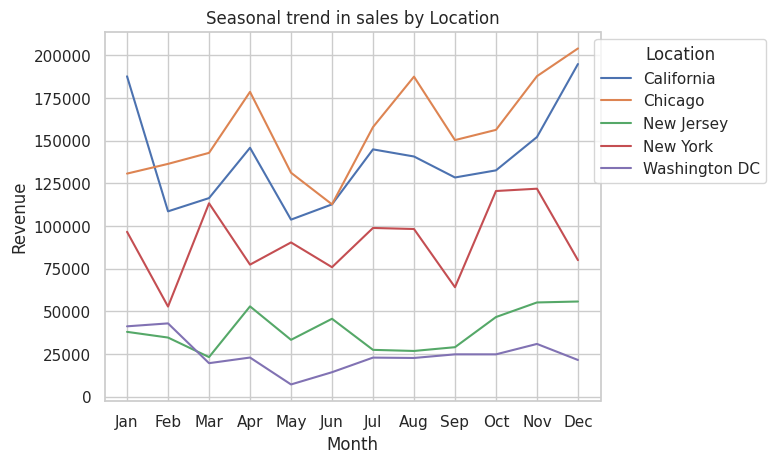

In [ ]:
ax = sns.lineplot(data=sales_trend_location, x="Month", y='Revenue', hue='Location')
ax.set_title('Seasonal trend in sales by Location')
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.35, 1), title="Location")
plt.show()

##### **3.14.2.2 Insights**
**Seasonal Trend in sales by Category**
- **"Nest-USA" Dominance:** This is the primary revenue driver. It has a massive peak in January, a secondary peak in July, and a sustained, steep climb from September through December.
- **Apparel's Spring Peak:** Apparel shows a distinct peak in April, coinciding with the Chicago location's peak, suggesting a correlation between that region and clothing sales.
- **"Nest" category Launch:** New category "Nest" started launched in November and peaked immediately

**Seasonal Trend in sales by Location**
- **Year-End Surge (Q4):** Almost all locations (especially Chicago and California) show a significant upward trajectory starting in October, peaking in December.
- **The "Chicago" Mid-Year Peaks:** Chicago exhibits unique, sharp spikes in April and August, suggesting specific regional events or local demand cycles.
- **The "California" January High:** Unlike other regions that dip after the holidays, California starts the year exceptionally strong in January before dipping in February.

##### **3.14.2.3 Strategy Recommendations**
**Preparing for Peak Seasons**
To maximize revenue during these high-demand periods, the company should implement the following:

- **Inventory Pre-Positioning (Q4 & January):** Since Nest-USA and Nest products explode in Q4 and stay high in January, inventory should be secured by September. Specifically, ensure West Coast fulfillment centers are stocked for the January California surge.
- **Staffing & Logistics Scalability:** Focus logistics resources on Chicago in April and August to handle the localized spikes in Apparel and other goods.
- **Dynamic Pricing/Bundling:** During the November/December peak for "Nest" products, use bundling (e.g., Nest + Accessories) to increase the Average Order Value (AOV) while demand is naturally high.

**Maximizing Off-Peak Seasons**
Off-peak periods (notably May–June and September for many categories) require a shift in strategy:

- **Targeted Promotions:** Use the May–June lull to run clearance sales on "Apparel" following its April peak to make room for summer/fall inventory.
- **Category Diversification:** Since "Nest" products dip in September, this is an ideal window to launch or promote "Back-to-School" categories (like Notebooks or Backpacks) which are currently lower-performing in our charts but have high seasonal potential.
- **Retention Campaigns:** Use data from our high-value January cohort (identified in the previous analysis) to run loyalty-based "early access" sales during off-peak months to stabilize the revenue floor.

### **3.15 Business Question 15**

#### **3.15.1 Question:** <font color='red'>Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?</font>


#### **3.15.2 Solution**

##### **3.15.2.1 Data Analysis and Visualization**

In [ ]:
daily_revenue = merged_df.groupby('Transaction_Date')['Revenue'].sum().reset_index()
daily_revenue['Weekday'] = daily_revenue['Transaction_Date'].dt.strftime('%A')
average_revenue_per_day = daily_revenue.groupby('Weekday')['Revenue'].mean().sort_values(
    ascending=False).reset_index()

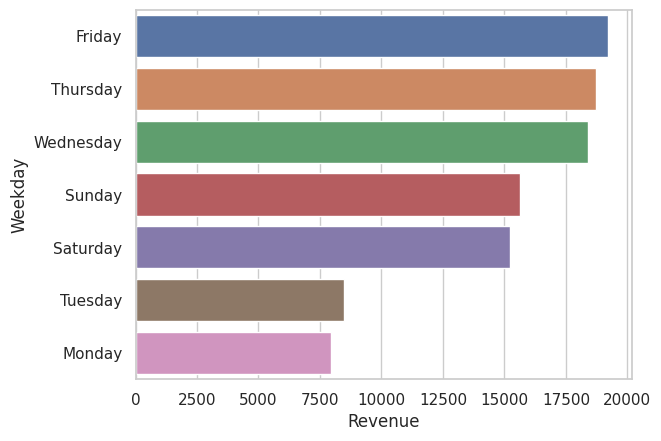

In [ ]:
sns.barplot(average_revenue_per_day, x="Revenue", y="Weekday", hue="Weekday", legend=False)
plt.show()

##### **3.15.2.2 Insights**
From the above data,
- High performing days are <font color='magenta'>`Friday, Thursday and Wednesday`</font> with average revenue per day in the range from **`16.5K to 17.3K`**
- Low performing days are <font color='green'>`Monday and Tuesday`</font> with average revenue per day below **`7.6K`** and average performing days are Weekends saturday and sunday.

##### **3.15.2.3 Strategy Recommendations `(to boost sales on slower days)`**
- We could use a **active sales model** instead of a passive one by providing a reason for the customers to visit on these days.
- Strategies like
  - <font color='magenta'>Happy Hour Flash sales</font> targeting customers on this low performing days.
  - <font color='blue'>Dropping new products/restocking</font> on these days instead of high performing days.
  - <font color='green'>Higher cashback or double loyalty points</font> to customers who buy on these days

## **4. Conclusion**

In this case study, we conducted extensive research on e-commerce data and derived data-driven insights to effectively enhance customer acquisition, retention, and revenue optimization. By integrating datasets across sales, marketing, and customer demographics, the business can transition from reactive selling to a proactive, evidence-based strategy.

**Key Strategic Pillars**
- **Revenue & Growth:** Calculating precise Invoice Values provides a clear baseline for measuring monthly performance and identifying acquisition fluctuations.
- **Retention Strategy:** Utilizing monthly retention rates and cohort analysis allows the business to pinpoint exactly when customers churn and implement re-engagement measures.
- **Marketing Efficiency:** Analyzing the correlation between spend and revenue through ROI and Market Spend % highlights opportunities to reallocate resources toward high-efficiency campaigns.
- **Customer Segmentation:** Applying RFM (Recency, Frequency, Monetary) principles enables the business to treat customers as distinct segments—Premium, Gold, Silver, and Standard—rather than a monolith.
- **Operational Optimization:** Recognizing seasonal trends and daily sales patterns ensures the company is prepared for peak periods through better inventory and promotional management.

By adopting these data-backed recommendations, the company can move beyond simple volume-based sales to a more profitable, loyalty-driven business model.